In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('news_articles.csv')

In [3]:
df.tail(15)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2081,-NO AUTHOR-,2016-10-27T06:30:35.864+03:00,dems sue gop over trumps rigged complaints,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/10/tax_paymen...,bias,Real,dems sue gop trumps rigged complaints,NaN,1.0
2082,-NO AUTHOR-,2016-10-27T06:32:38.028+03:00,yearold hebrew mention of jerusalem found,NaN,english,wnd.com,http://mobile.wnd.com/files/2016/07/trump_make...,bias,Real,hillary emails whitelisted obamas blackberry,NaN,1.0
2083,-NO AUTHOR-,2016-10-27T07:20:12.250+03:00,boycott targets trump family on retail front,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/obama_blackbe...,bias,Real,support assaultweapon ban hits record low,NaN,1.0
2084,-NO AUTHOR-,2016-10-27T07:20:12.436+03:00,obamacare tax penalty ill take it millions say,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/assault_weapo...,bias,Real,pope god promised land people israel,NaN,1.0
2085,-NO AUTHOR-,2016-10-27T08:14:27.425+03:00,dems sue gop over trumps rigged complaints,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/pope_francis_...,bias,Real,christs burial place exposed st time centuries,NaN,1.0
2086,-NO AUTHOR-,2016-10-27T08:20:38.377+03:00,hillary emails whitelisted for obamas blackberry,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/jpg_holy_sepu...,bias,Real,prof canoes reek genocide white privilege,NaN,1.0
2087,-NO AUTHOR-,2016-10-27T15:10:52.832+03:00,support for assaultweapon ban hits record low,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/canoe.jpg,bias,Real,teens walk free gangrape conviction,NaN,1.0
2088,-NO AUTHOR-,2016-10-27T15:24:15.986+03:00,pope god promised the land to people of israel,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/trial_teens_g...,bias,Real,school named munichmassacre mastermind,NaN,1.0
2089,-NO AUTHOR-,2016-10-27T15:24:17.638+03:00,christs burial place exposed for st time in ce...,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/Salah_Khalaf.jpg,bias,Real,russia unveils satan missile,NaN,1.0
2090,-NO AUTHOR-,2016-10-27T15:36:09.934+03:00,prof canoes reek of genocide white privilege,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/satan2_missil...,bias,Real,check hillarythemed haunted house,NaN,1.0


In [4]:
df.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [6]:
df.shape

(2096, 12)

In [7]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
timesplit = df['published'].str.split('T', 1, expand=True)
df['Time']=timesplit[1]
df['Date']=timesplit[0]

In [10]:
datesplit = df['Date'].str.split('-',n=-1, expand=True)
df['Year']=datesplit[0]
df['Month']=datesplit[1]
df['Day']=datesplit[2]

In [11]:
df.loc[df.Month == 'content/uploads/2014/04/jucundus']
df.drop(848, inplace=True)
df.loc[df.Month == 'content/uploads/2015/07/Earth']
df.drop(1838, inplace=True)

In [12]:
df = df.astype({"Month": float, "Day":float})

In [13]:
df.tail(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,Time,Date,Year,Month,Day
2041,Matt Barber,2016-10-27T03:04:50.327+03:00,why never trumpers must reconsider,prof canoes reek of genocide white privilege c...,english,wnd.com,No Image URL,bias,Real,trump vs clinton risk vs disaster,check hillarythemed haunted house anticlinton ...,0.0,03:04:50.327+03:00,2016-10-27,2016,10.0,27.0
2042,Jane Chastain,2016-10-27T03:04:50.704+03:00,election crossroads socialism or capitalism,teens walk free after gangrape conviction judg...,english,wnd.com,No Image URL,bias,Real,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,1.0,03:04:50.704+03:00,2016-10-27,2016,10.0,27.0
2043,Michael Brown,2016-10-27T03:04:54.788+03:00,reasons ill vote for trump,school named for munichmassacre mastermind ter...,english,wnd.com,http://mobile.wnd.com/files/2011/12/leftfield3...,bias,Real,youtube bans clintons black son,skype sex scam fortune built shame moroccan bo...,1.0,03:04:54.788+03:00,2016-10-27,2016,10.0,27.0
2044,Ann Coulter,2016-10-27T03:05:01.989+03:00,our new country women and minorities hit hardest,wars and rumors of wars russia unveils satan ...,english,wnd.com,http://www.wnd.com/files/2016/10/danney-willll...,bias,Real,wikileaks bombshells hillary need know,posted eddie skyhigh potency may scare away cr...,1.0,03:05:01.989+03:00,2016-10-27,2016,10.0,27.0
2045,Larry Elder,2016-10-27T03:05:05.815+03:00,trump vs clinton a risk vs a disaster,check out hillarythemed haunted house anticlin...,english,wnd.com,http://www.wnd.com/files/2015/10/Hillary-Clint...,bias,Real,fascinated sex,billion even known keeping supposedly deleted ...,0.0,03:05:05.815+03:00,2016-10-27,2016,10.0,27.0


In [14]:
dum_type=pd.get_dummies(df.label,drop_first=True,prefix="")
df=df.join(dum_type)
df.drop('label', axis=1, inplace=True)
df.rename(columns={'_Real':'Real'}, inplace=True)

Text(0.5, 1.0, 'Count of Real and Fake Data')

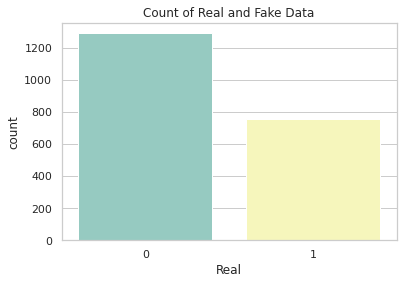

In [15]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Real", data=df, palette='Set3')
ax.set_title("Count of Real and Fake Data")

Text(0.5, 1.0, 'Count of Languages of the news')

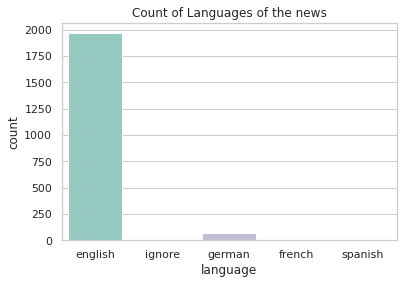

In [16]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="language", data=df, palette='Set3')
ax.set_title("Count of Languages of the news")

Text(0.5, 1.0, 'Count of Type of the news')

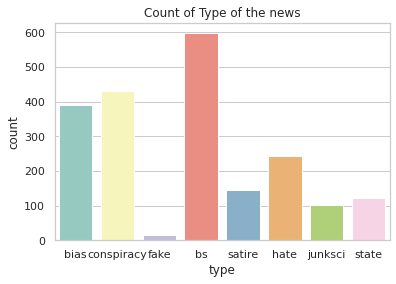

In [17]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="type", data=df, palette='Set3')
ax.set_title("Count of Type of the news")

Text(0.5, 1.0, 'Count of news with Images')

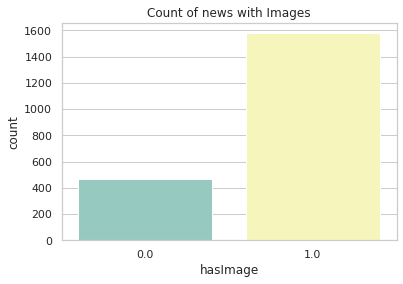

In [18]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="hasImage", data=df, palette='Set3')
ax.set_title("Count of news with Images")

Text(0.5, 1.0, 'Top 10 Authors with count of news')

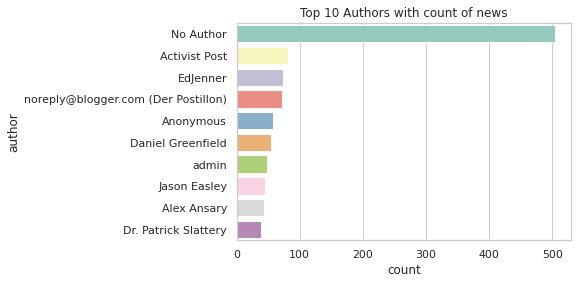

In [19]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="author", data=df, palette='Set3', order =df.author.value_counts().iloc[:10].index)
ax.set_title("Top 10 Authors with count of news")

Text(0.5, 1.0, 'Top 10 Site URLS with count of news')

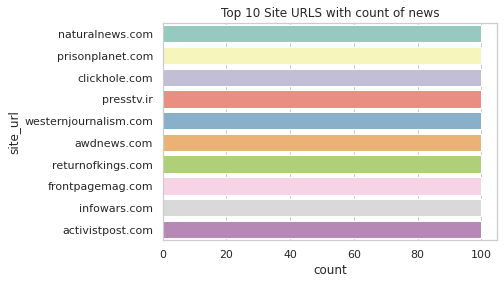

In [20]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(y="site_url", data=df, palette='Set3', order =df.site_url.value_counts().iloc[:10].index)
ax.set_title("Top 10 Site URLS with count of news")

Text(0.5, 1.0, 'Months of published news')

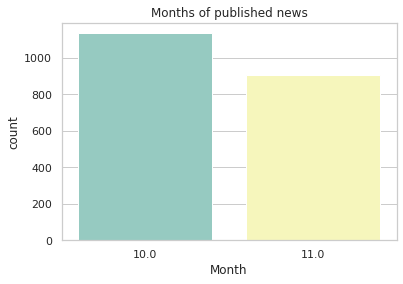

In [21]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Month", data=df, palette='Set3')
ax.set_title("Months of published news")

Text(0.5, 1.0, 'Days of published news')

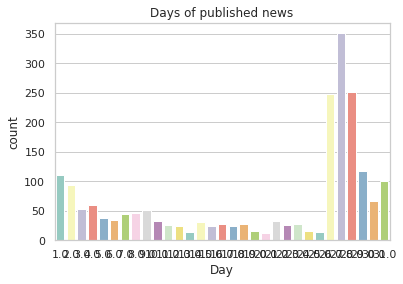

In [22]:
sb.set_theme(style="whitegrid")
ax = sb.countplot(x="Day", data=df, palette='Set3')
sb.set(rc = {'figure.figsize':(10,10)})
ax.set_title("Days of published news")

In [23]:
df.loc[df.Real == 0].author.value_counts().head(10)

No Author                              329
Activist Post                           82
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
admin                                   48
Alex Ansary                             44
Henry Wolff                             33
Corbett                                 27
tokyowashi (noreply@blogger.com)        20
Steve Watson                            16
Name: author, dtype: int64

In [24]:
df.loc[df.Real == 0].site_url.value_counts().head(10)

naturalnews.com       100
awdnews.com           100
infowars.com          100
activistpost.com      100
clickhole.com         100
prisonplanet.com       99
abeldanger.net         82
der-postillon.com      72
ahtribune.com          67
abovetopsecret.com     53
Name: site_url, dtype: int64

In [25]:
df.loc[df.Real == 1].author.value_counts().head(10)

No Author               176
EdJenner                 73
Daniel Greenfield        53
Jason Easley             45
Dr. Patrick Slattery     36
-NO AUTHOR-              22
Sarah Jones              16
Hrafnkell Haraldsson     15
Roosh Valizadeh          15
Fed Up                   12
Name: author, dtype: int64

In [26]:
df.loc[df.Real == 1].site_url.value_counts().head(10)

politicususa.com         100
presstv.ir                99
returnofkings.com         99
frontpagemag.com          99
westernjournalism.com     98
dailywire.com             81
wnd.com                   51
davidduke.com             43
100percentfedup.com       33
presstv.com               21
Name: site_url, dtype: int64

In [27]:
real = set(df[df['Real'] == 1]['site_url'].unique())
fake = set(df[df['Real'] == 0]['site_url'].unique())
print(f"{real & fake}")

{'washingtonsblog.com', 'prisonplanet.com', 'returnofkings.com', 'frontpagemag.com', 'presstv.ir', 'westernjournalism.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'newstarget.com'}


In [28]:
target = df.Real
features = df[['author','site_url','text_without_stopwords']]

In [29]:
features

,author,site_url,text_without_stopwords
0,Barracuda Brigade,100percentfedup.com,print pay back money plus interest entire fami...
1,reasoning with facts,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,100percentfedup.com,red state fox news sunday reported morning ant...
3,Fed Up,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,Fed Up,100percentfedup.com,email healthcare reform make america great sin...
...,...,...,...
2041,Matt Barber,wnd.com,check hillarythemed haunted house anticlinton ...
2042,Jane Chastain,wnd.com,good samaritan wearing indian headdress disarm...
2043,Michael Brown,wnd.com,skype sex scam fortune built shame moroccan bo...
2044,Ann Coulter,wnd.com,posted eddie skyhigh potency may scare away cr...


In [30]:
features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features=features.combined_url_text

/root/anaconda3/envs/exp1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/root/anaconda3/envs/exp1/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
features

0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2041    Matt Barber wnd.com check hillarythemed haunte...
2042    Jane Chastain wnd.com good samaritan wearing i...
2043    Michael Brown wnd.com skype sex scam fortune b...
2044    Ann Coulter wnd.com posted eddie skyhigh poten...
2045    Larry Elder wnd.com billion even known keeping...
Name: combined_url_text, Length: 2043, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_words = TfidfVectorizer(stop_words='english')
X = vectorizer_words.fit_transform(features)

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration 0, inertia 3935.7181279547576
Iteration 1, inertia 1994.0234002648742
Iteration 2, inertia 1989.5890650649917
Iteration 3, inertia 1987.431849705778
Iteration 4, inertia 1985.8200051198514
Iteration 5, inertia 1984.69632442103
Iteration 6, inertia 1983.937769667461
Iteration 7, inertia 1983.5746964510342
Iteration 8, inertia 1983.3980667580643
Iteration 9, inertia 1983.3445276900725
Iteration 10, inertia 1983.332626825183
Iteration 11, inertia 1983.3302139556206
Iteration 12, inertia 1983.3279030077888
Converged at iteration 12: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, verbose=True)

In [34]:
import numpy as np
np.unique(km.labels_, return_counts=True)
features.reset_index(drop=True, inplace=True)

In [35]:
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [36]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 

In [37]:
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [38]:
keywords

{0: ['one',
  'people',
  'us',
  'said',
  'would',
  'also',
  'like',
  'time',
  'even',
  'get',
  'new',
  'state',
  'world',
  'many',
  'could',
  'dont',
  'years',
  'life',
  'first',
  'two',
  'government',
  'women',
  'police',
  'see',
  'make',
  'way',
  'der',
  'well',
  'right',
  'author',
  'know',
  'take',
  'states',
  'may',
  'back',
  'man',
  'men',
  'media',
  'much',
  'news',
  'american',
  'day',
  'good',
  'every',
  'want',
  'made',
  'october',
  'go',
  'since',
  'die',
  'think',
  'food',
  'another',
  'say',
  'president',
  'war',
  'still',
  'public',
  'going',
  'according',
  'need',
  'trump',
  'never',
  'year',
  'health',
  'last',
  'force',
  'next',
  'work',
  'white',
  'around',
  'political',
  'human',
  'use',
  'united',
  'used',
  'country',
  'law',
  'today',
  'part',
  'free',
  'im',
  'brain',
  'water',
  'power',
  'without',
  'city',
  'system',
  'times',
  'mind',
  'really',
  'show',
  'might',
  'de',

In [39]:
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0=set0-set1
unique1 =set1-set0

In [40]:
unique_keys={}
unique_keys[0]=nlargest(10, unique0, key=counts[0].get)
unique_keys[1]=nlargest(10, unique1, key=counts[1].get)

In [41]:
unique_keys

{0: ['life',
  'police',
  'der',
  'author',
  'men',
  'man',
  'good',
  'want',
  'die',
  'food'],
 1: ['clinton',
  'hillary',
  'election',
  'campaign',
  'donald',
  'fbi',
  'clintons',
  'email',
  'emails',
  'trumps']}

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names())

In [43]:
print(tfidf_train.shape)
print(y_train.shape)

(1634, 42094)
(1634,)


In [44]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNb = KNeighborsClassifier(n_neighbors=5)
KNb.fit(tfidf_train, y_train)
y_pred = KNb.predict(tfidf_test)
KNscore=metrics.accuracy_score(y_test,y_pred)
print("Kneighbors Model accuracy: %0.4f" %KNscore)

Kneighbors Model accuracy: 0.7726
CPU times: user 68.4 ms, sys: 28.2 ms, total: 96.5 ms
Wall time: 95.5 ms


In [45]:
%%time
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000)
RF.fit(tfidf_train,y_train)
y_pred = RF.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("Random Forest Model accuracy:  %0.4f" %RFscore)

Random Forest Model accuracy:  0.9413
CPU times: user 15.7 s, sys: 98 ms, total: 15.8 s
Wall time: 15.8 s


In [46]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Ada boost Classifier accuracy: %0.4f" %ABscore)

Ada boost Classifier accuracy: 0.9682
CPU times: user 1.55 s, sys: 3.53 ms, total: 1.55 s
Wall time: 1.55 s


In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[253   8]
 [  5 143]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

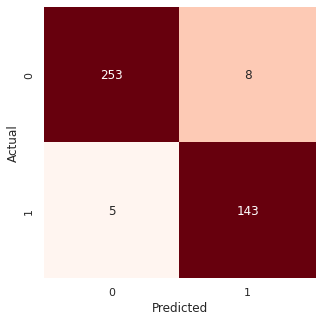

In [48]:
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="Reds",annot_kws={"size":12} ,cbar=False, fmt='g')